In [22]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

import matplotlib as mpl

from math import *

from MITgcmutils import rdmds

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt

#lib_path = os.path.abspath('/Users/anakarinarm/SubmarineCanyonsResearch/PythonModulesMITgcm') # Add absolute path to my python scripts

#sys.path.append(lib_path)

#import ReadOutTools_MITgcm as rout 


In [20]:
sns.set()
sns.set_style('dark')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)

Ptracer3D1='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
PtracerOut3D1 = Dataset(Ptracer3D1)

Ptracer3D2='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
PtracerOut3D2 = Dataset(Ptracer3D2)

Ptracer3D3='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
PtracerOut3D3 = Dataset(Ptracer3D3)

Ptracer3D4='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'
PtracerOut3D4 = Dataset(Ptracer3D4)


In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

z = CanyonStateOut.variables['Z']



In [6]:
Tr1 = rout.getField(Ptracer,'Tr1') # 
#Tr2 = rout.getField(Ptracer,'Tr2')
Tr3 = rout.getField(Ptracer,'Tr3')

#Tr13D = rout.getField(Ptracer3D1,'Tr1') # 
#Tr23D = rout.getField(Ptracer3D2,'Tr1')
Tr33D = rout.getField(Ptracer3D3,'Tr1')
#Tr43D = rout.getField(Ptracer3D4,'Tr1')


In [7]:
#Tr1
ConcDepths = np.empty((19,360,360))
    
for tt in range(18):
    print(tt)
    ConcInd = np.argmax(Tr1[tt,:,:,:]>=7.6,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths[tt,i,j] = z[ConcInd[i,j]]

print(np.shape(ConcDepths))
ConcDepthsMasked = np.ma.masked_values(ConcDepths,-2.5)
ConcDepths[np.where(np.ma.getmask(ConcDepthsMasked)==True)] = np.nan





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
(19, 360, 360)


In [8]:
#Tr3
ConcDepthsb = np.empty((19,360,360))

for tt in range(18):
    print(tt)
    ConcIndb = np.argmax(Tr3[tt,:,:,:]>=7.6,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepthsb[tt,i,j] = z[ConcIndb[i,j]]

print(np.shape(ConcDepthsb))
ConcDepthsMaskedb = np.ma.masked_values(ConcDepthsb,-2.5)
ConcDepthsb[np.where(np.ma.getmask(ConcDepthsMaskedb)==True)] = np.nan


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
(19, 360, 360)


In [9]:
#Tr3
ConcDepthsc = np.empty((19,360,360))

for tt in range(18):
    print(tt)
    ConcIndc = np.argmax(Tr33D[tt,:,:,:]>=7.6,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepthsc[tt,i,j] = z[ConcIndc[i,j]]

print(np.shape(ConcDepthsc))
ConcDepthsMaskedc = np.ma.masked_values(ConcDepthsc,-2.5)
ConcDepthsc[np.where(np.ma.getmask(ConcDepthsMaskedc)==True)] = np.nan


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
(19, 360, 360)


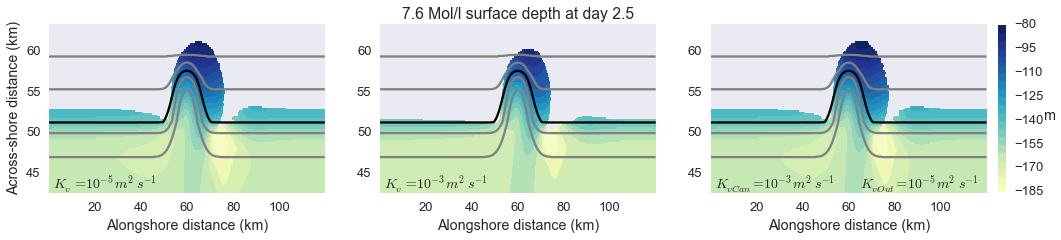

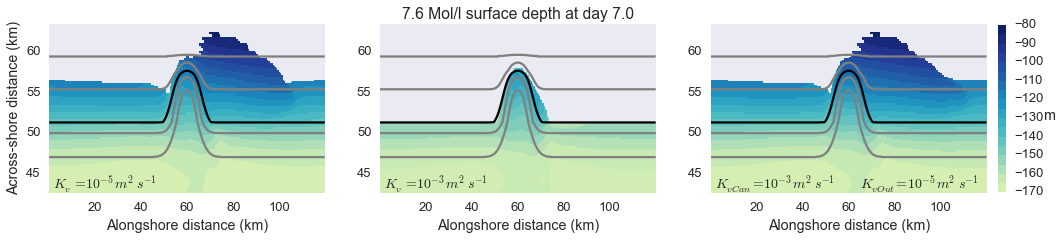

In [90]:

plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})
times = [5,14]
plt.clf()
for tt in times:
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(20, 6))
    
    iso = ax1.contourf(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,ConcDepths[tt,160:-75,:],20,cmap='YlGnBu',vmin=-190,vmax=-80)
    cset = ax1.contour(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax1.set_aspect('auto')
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    ax1.annotate('$K_v=10^{-5}m^2s^{-1}$', xy=(2,61), xytext=(2,43),fontsize = 14)
    ax1.set_aspect(3.5)
    
    iso = ax2.contourf(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,ConcDepthsb[tt,160:-75,:],20,cmap='YlGnBu',vmin=-190,vmax=-80)
    cset = ax2.contour(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_xlabel('Alongshore distance (km)')
    ax2.set_title('7.6 Mol/l surface depth at day %0.1f ' %(tt/2.0))
    ax2.annotate('$K_v=10^{-3}m^2s^{-1}$', xy=(2,61), xytext=(2,43),fontsize = 14)
    ax2.set_aspect(3.5)
    
    iso = ax3.contourf(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,ConcDepthsc[tt,160:-75,:],20,cmap='YlGnBu',vmin=-190,vmax=-80)
    cax,kw = mpl.colorbar.make_axes([ax1,ax2,ax3],location='right',shrink=0.5, pad = 0.01)
    cb = plt.colorbar(iso, cax=cax,**kw)
    cb.set_label('m', rotation='horizontal',labelpad=6.5)
    cset = ax3.contour(xc[160:-75,:]/1000.0,yc[160:-75,:]/1000.0,-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')
    ax3.set_aspect(3.5)
    ax3.set_xlabel('Alongshore distance (km)')
    ax3.annotate('$K_{vCan}=10^{-3}m^2s^{-1}$', xy=(2,61), xytext=(2,43),fontsize = 14)
    ax3.annotate('$K_{vOut}=10^{-5}m^2s^{-1}$', xy=(2,57), xytext=(65,43),fontsize = 14)

    
plt.show()

fig.savefig('results/figures/PosterOSM16/IsoconcSurfaceDepth.eps', format='eps', dpi=1000, bbox_inches='tight')
fig.savefig('results/figures/PosterOSM16/IsoconcSurfaceDepth.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [14]:
#Tr1
ConcDepths2 = np.empty((19,360,360))
    
for tt in range(18):
    ConcInd2 = np.argmax(Tr1[tt,:,:,:]>=7.8,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths2[tt,i,j] = z[ConcInd2[i,j]]

print(np.shape(ConcDepths2))
ConcDepthsMasked2 = np.ma.masked_values(ConcDepths2,-2.5)
ConcDepths2[np.where(np.ma.getmask(ConcDepthsMasked2)==True)] = np.nan

#Tr3
ConcDepths2b = np.empty((19,360,360))
    
for tt in range(18):
    ConcInd2b = np.argmax(Tr3[tt,:,:,:]>=7.8,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths2b[tt,i,j] = z[ConcInd2b[i,j]]

print(np.shape(ConcDepths2b))
ConcDepthsMasked2b = np.ma.masked_values(ConcDepths2b,-2.5)
ConcDepths2b[np.where(np.ma.getmask(ConcDepthsMasked2b)==True)] = np.nan

#Tr3
ConcDepths2c = np.empty((19,360,360))
    
for tt in range(18):
    ConcInd2c = np.argmax(Tr33D[tt,:,:,:]>=7.8,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths2c[tt,i,j] = z[ConcInd2c[i,j]]

print(np.shape(ConcDepths2c))
ConcDepthsMasked2c = np.ma.masked_values(ConcDepths2c,-2.5)
ConcDepths2c[np.where(np.ma.getmask(ConcDepthsMasked2c)==True)] = np.nan


(19, 360, 360)
(19, 360, 360)
(19, 360, 360)


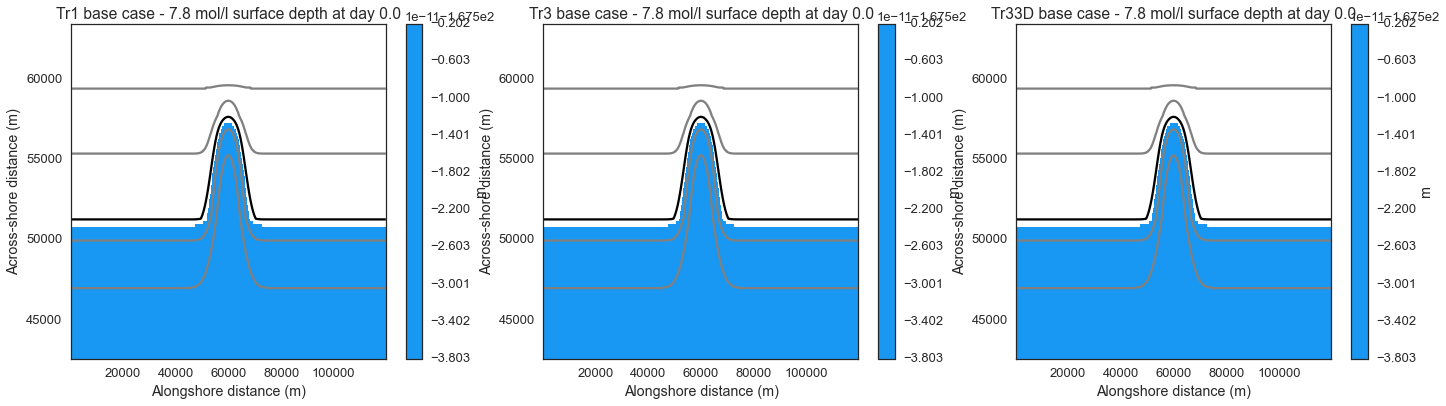

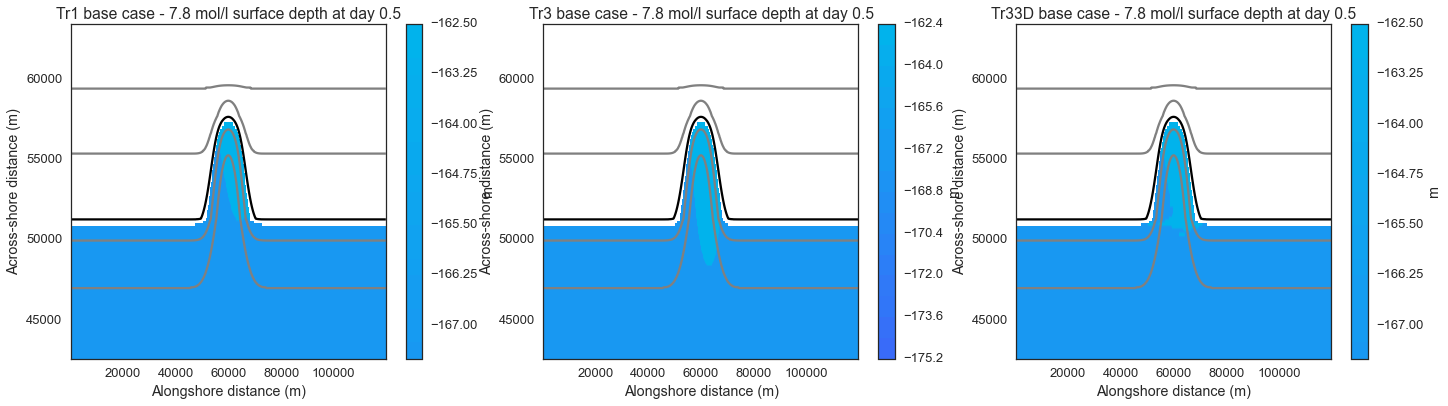

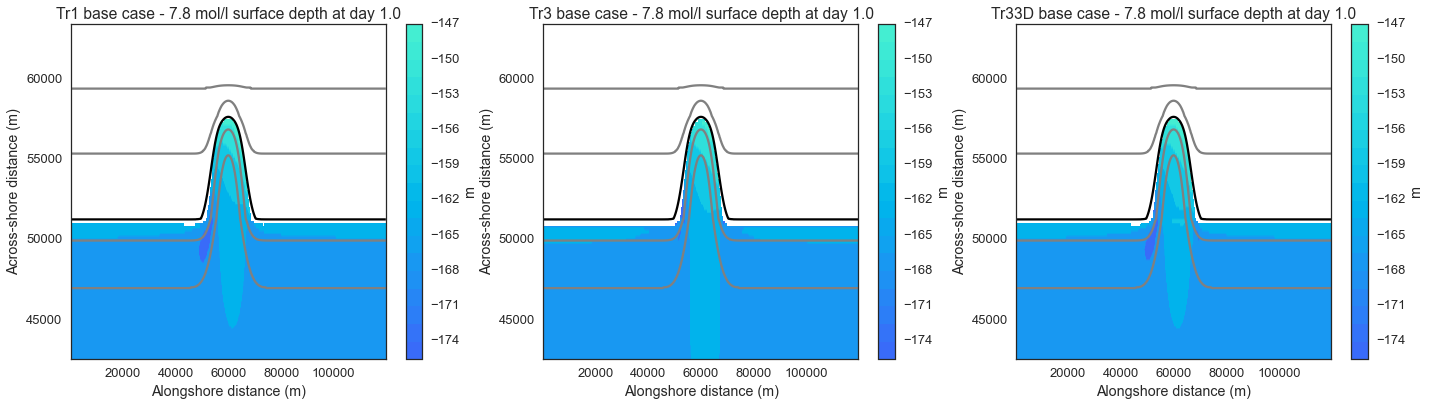

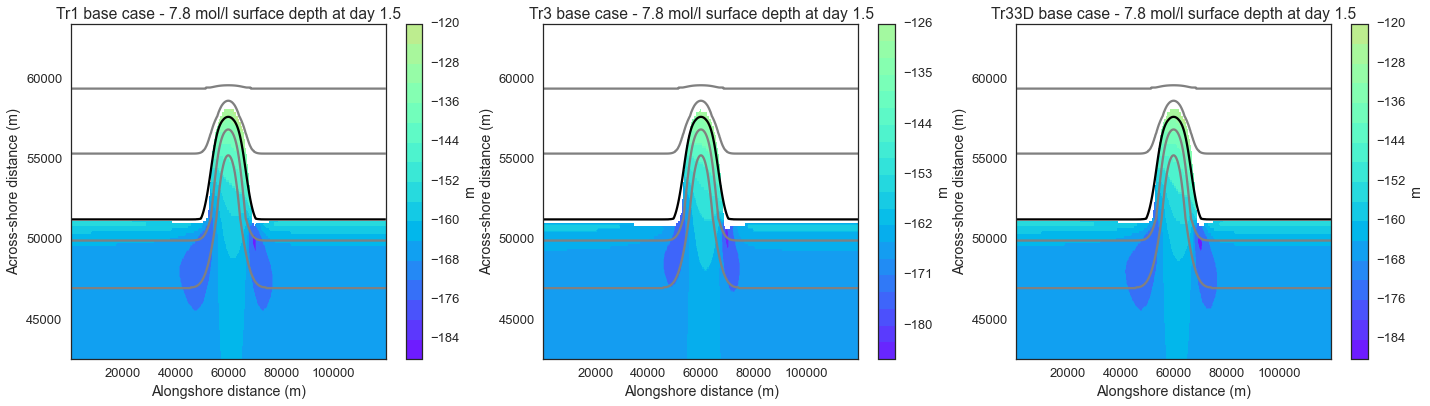

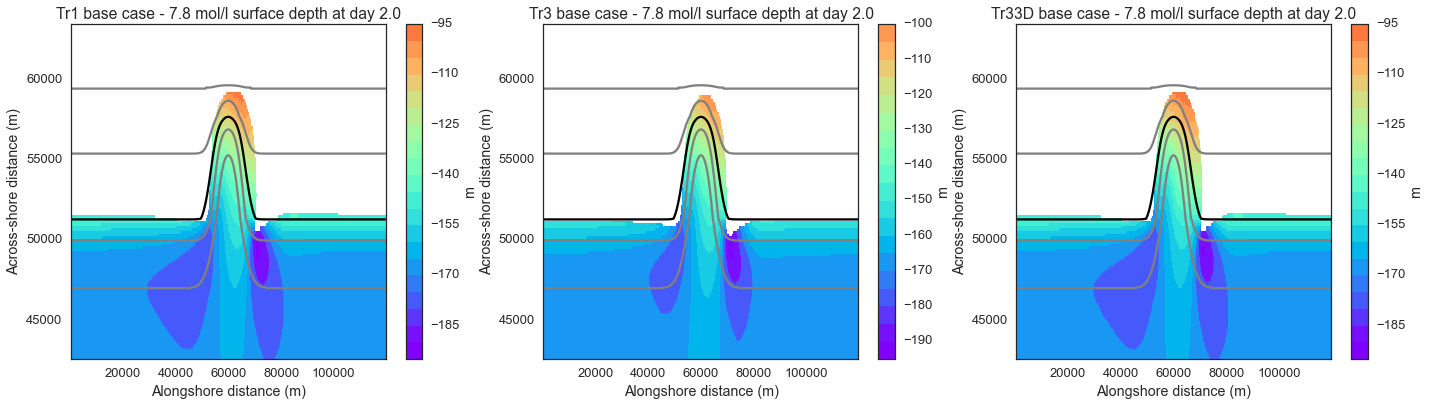

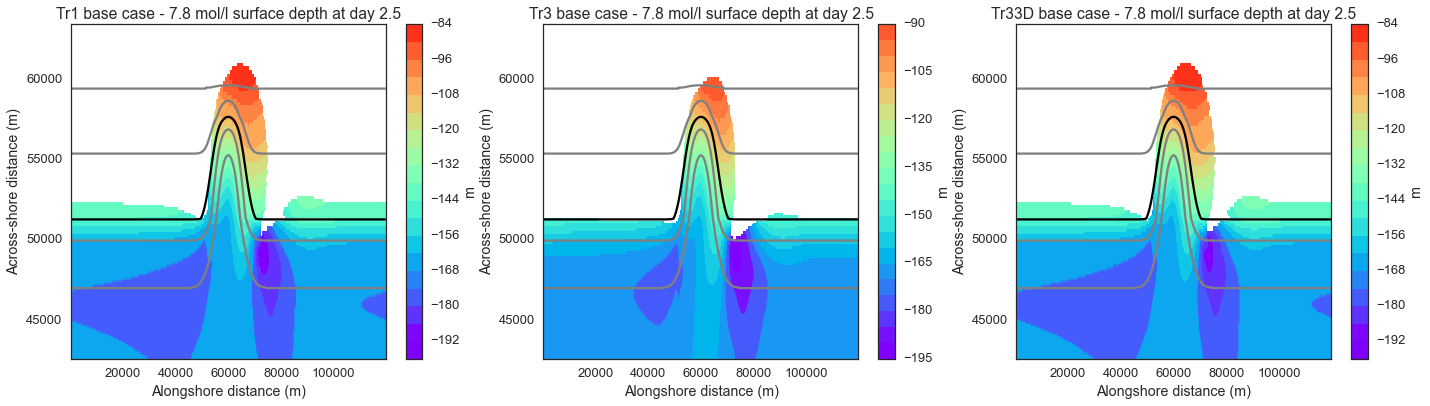

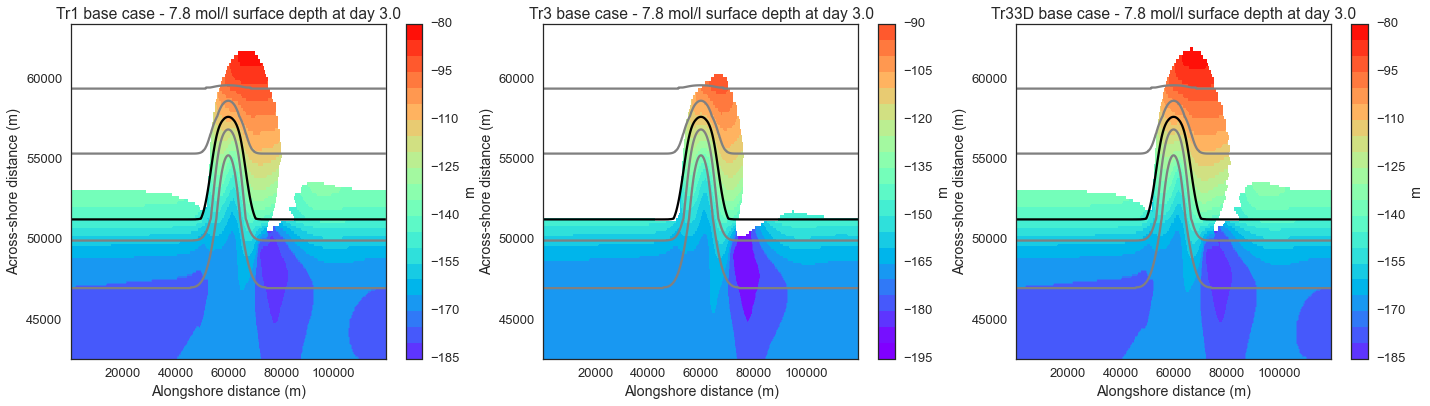

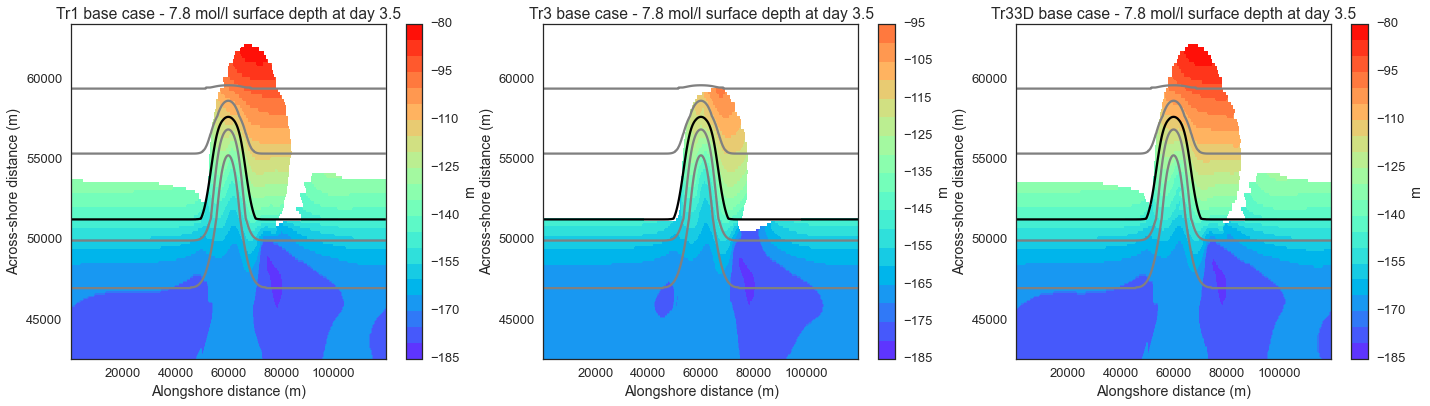

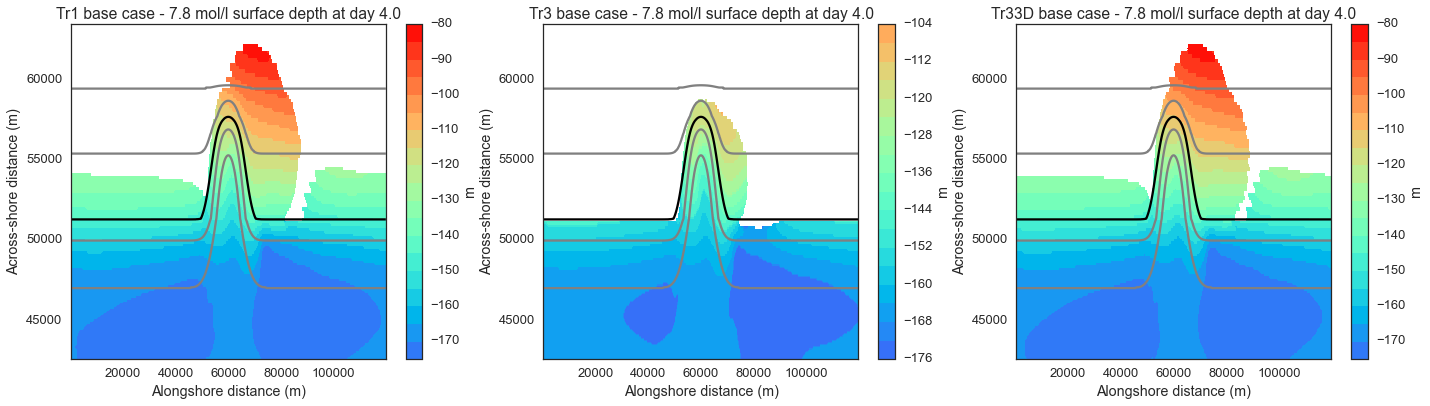

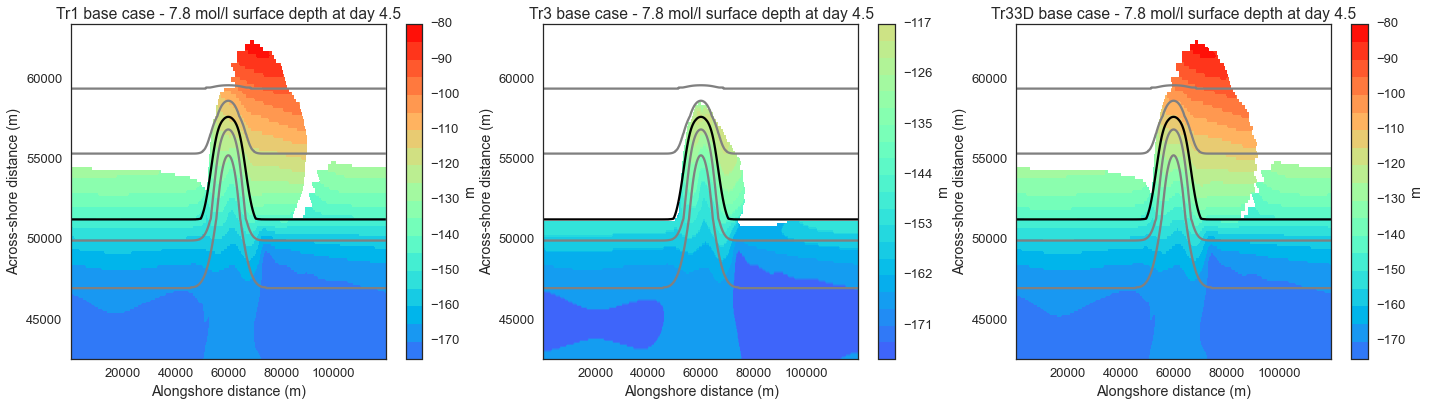

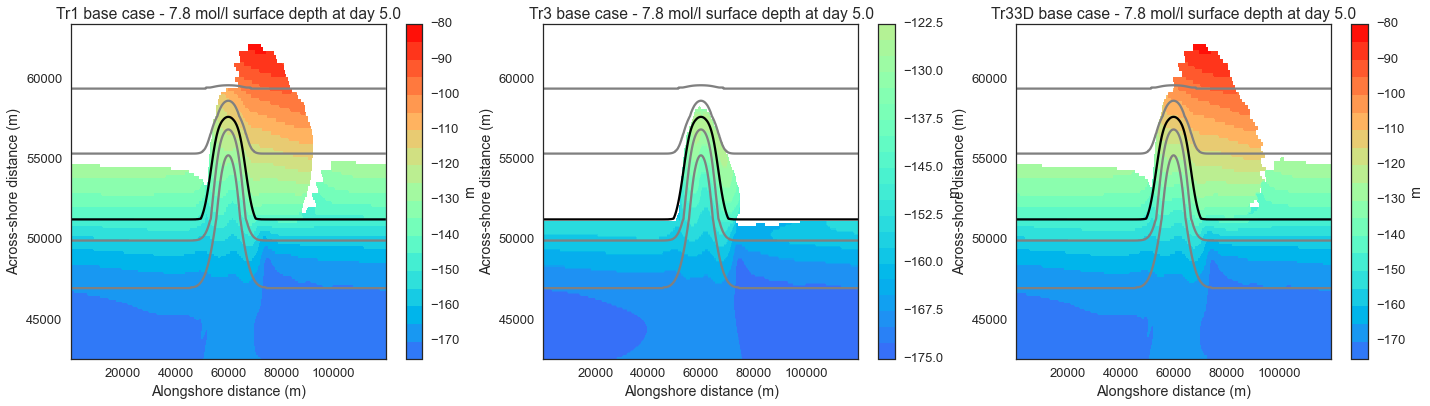

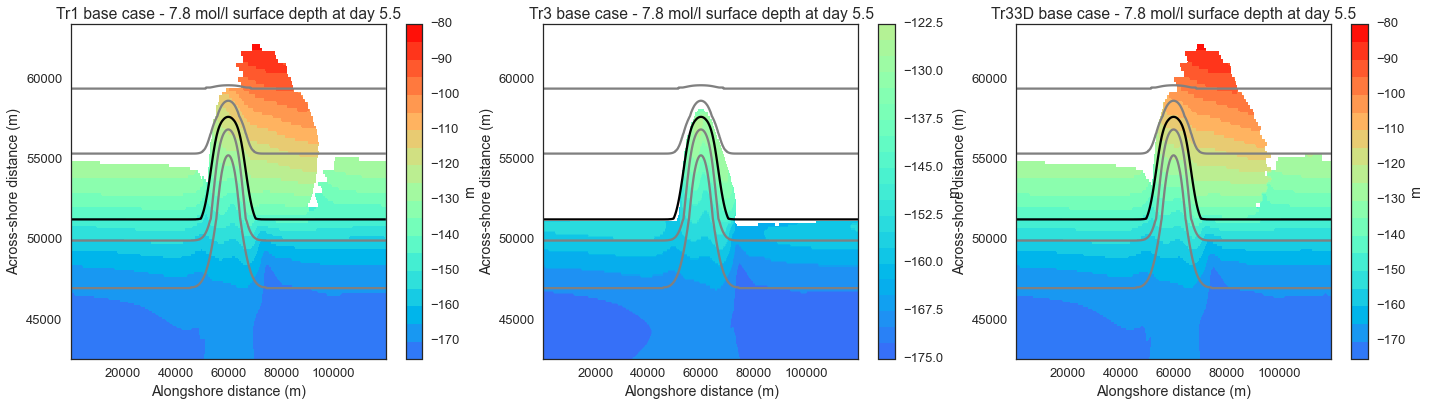

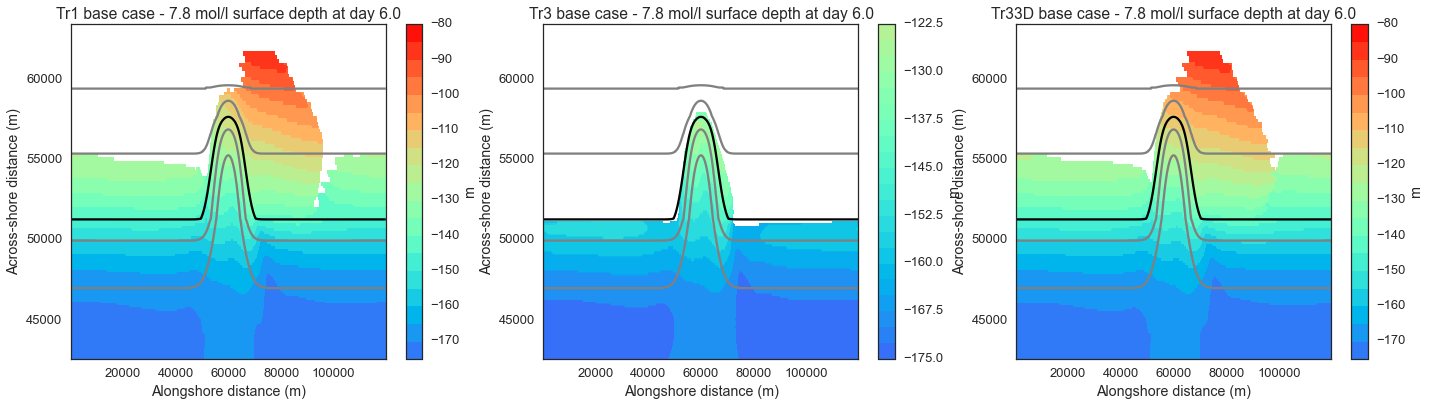

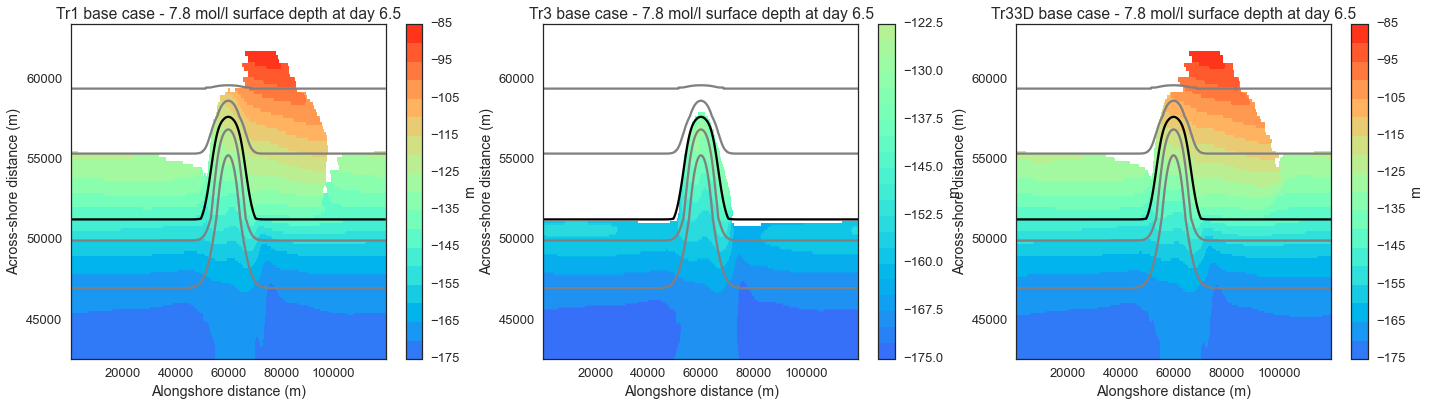

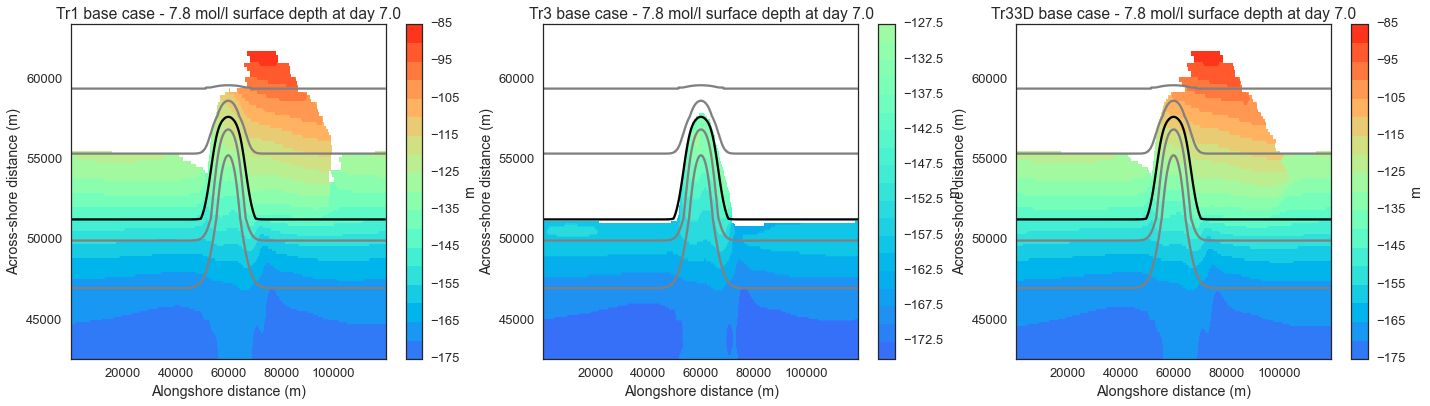

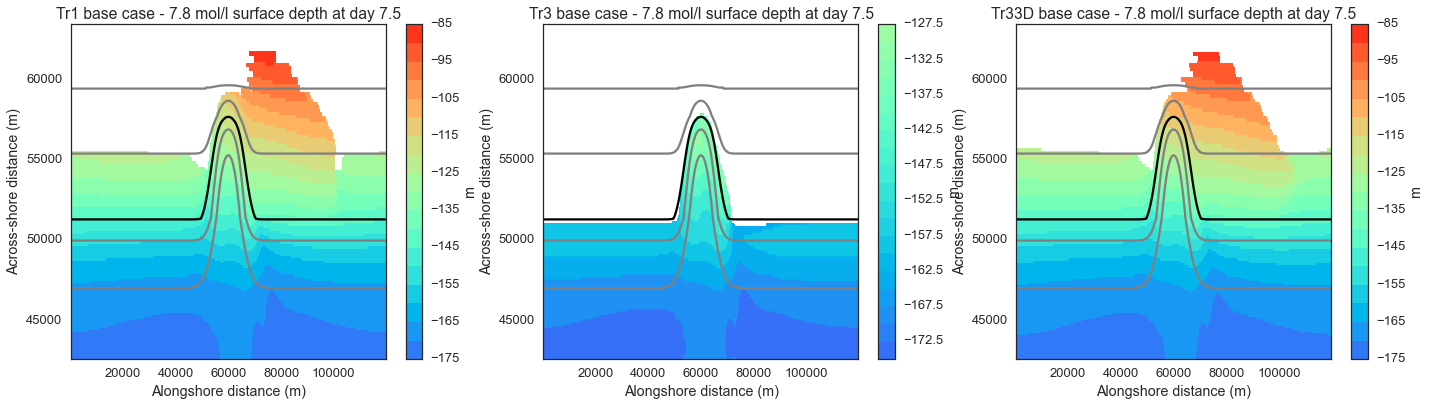

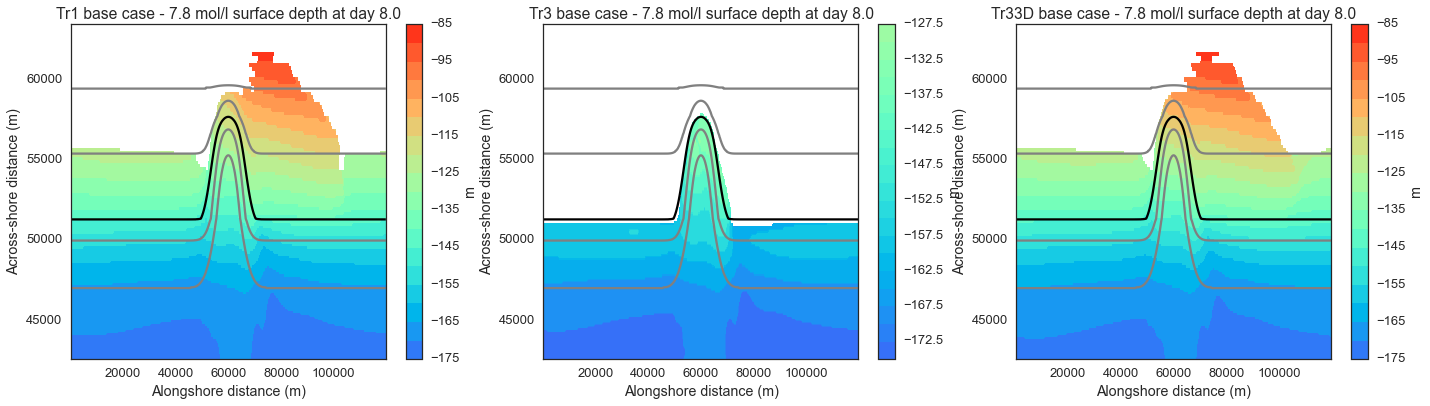

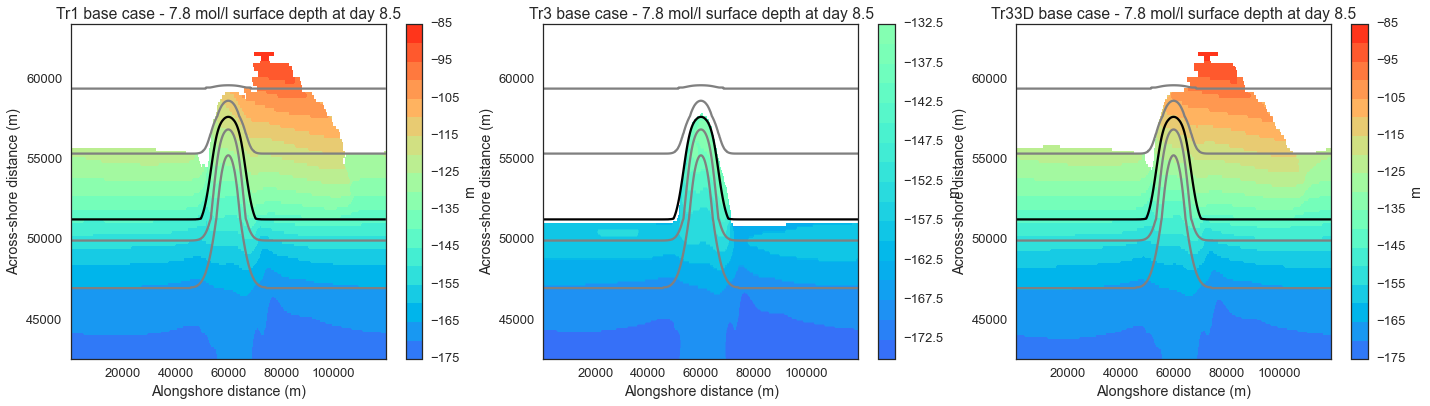

In [16]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


for tt in range(18):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(24, 6))
    
    iso = ax1.contourf(xc[160:-75,:],yc[160:-75,:],ConcDepths2[tt,160:-75,:],20,cmap='rainbow',vmin=-190,vmax=-80)
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    cb.set_label('m')
    cset = ax1.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Tr1 base case - 7.8 mol/l surface depth at day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax2.contourf(xc[160:-75,:],yc[160:-75,:],ConcDepths2b[tt,160:-75,:],20,cmap='rainbow',vmin=-190,vmax=-80)
    cb = plt.colorbar(iso, shrink=1,ax=ax2)

    cb.set_label('m')
    cset = ax2.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Tr3 base case - 7.8 mol/l surface depth at day %0.1f ' %(tt/2.0))
    ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    iso = ax3.contourf(xc[160:-75,:],yc[160:-75,:],ConcDepths2c[tt,160:-75,:],20,cmap='rainbow',vmin=-190,vmax=-80)
    cb = plt.colorbar(iso, shrink=1,ax=ax3)

    cb.set_label('m')
    cset = ax3.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax3.set_aspect('auto')
    ax3.set_title('Tr33D base case - 7.8 mol/l surface depth at day %0.1f ' %(tt/2.0))
    ax3.set_ylabel('Across-shore distance (m)')
    ax3.set_xlabel('Alongshore distance (m)')
  
    
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

In [17]:
ConcDepths3 = np.empty((19,360,360))
    
for tt in range(18):
    ConcInd = np.argmax(Tr1[tt,:,:,:]>=8.4,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths3[tt,i,j] = z[ConcInd[i,j]]

print(np.shape(ConcDepths3))
ConcDepthsMasked3 = np.ma.masked_values(ConcDepths3,-2.5)
ConcDepths3[np.where(np.ma.getmask(ConcDepthsMasked3)==True)] = np.nan

ConcDepths3c = np.empty((19,360,360))
    
for tt in range(18):
    ConcInd = np.argmax(Tr1[tt,:,:,:]>=8.4,axis=0) 
    for i in range(360):
        for j in range(360):
            ConcDepths3c[tt,i,j] = z[ConcInd[i,j]]

print(np.shape(ConcDepths3c))
ConcDepthsMasked3c = np.ma.masked_values(ConcDepths3c,-2.5)
ConcDepths3c[np.where(np.ma.getmask(ConcDepthsMasked3c)==True)] = np.nan


(19, 360, 360)
(19, 360, 360)


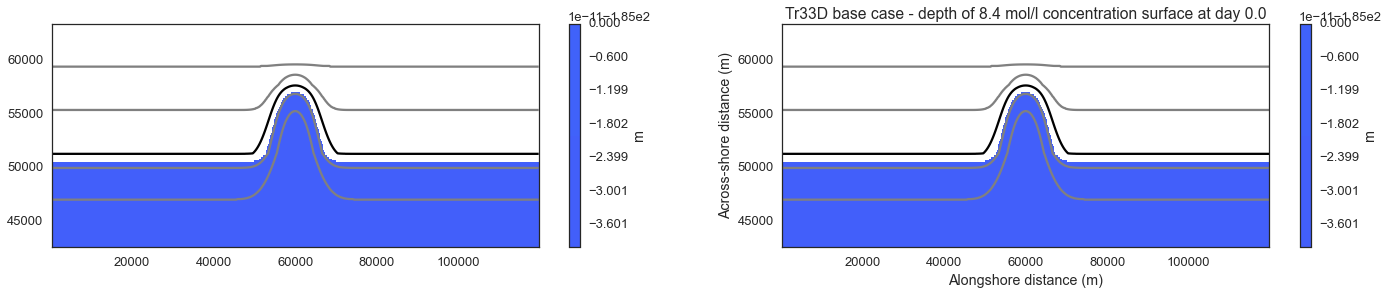

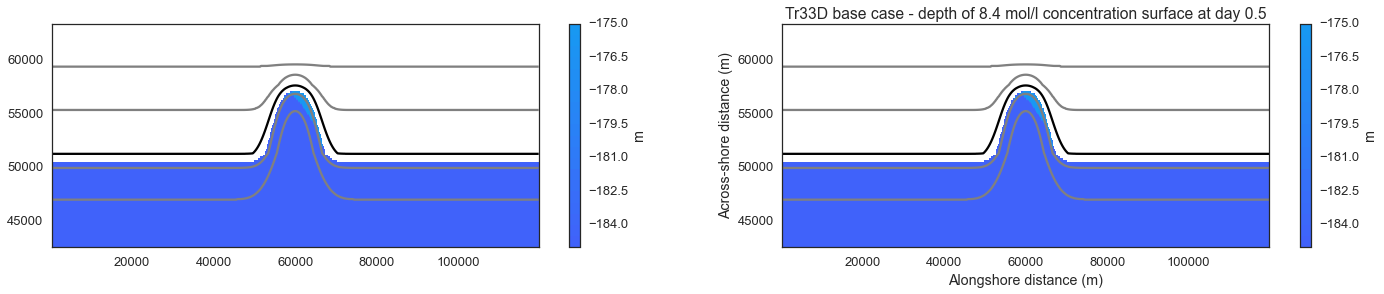

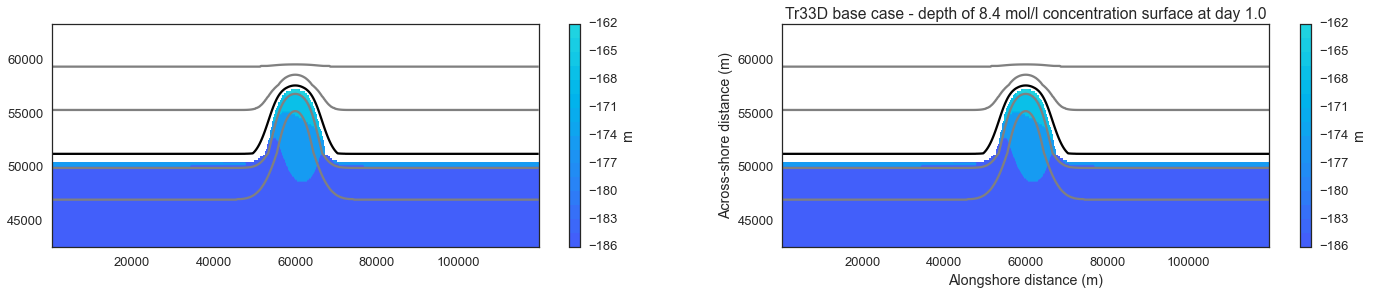

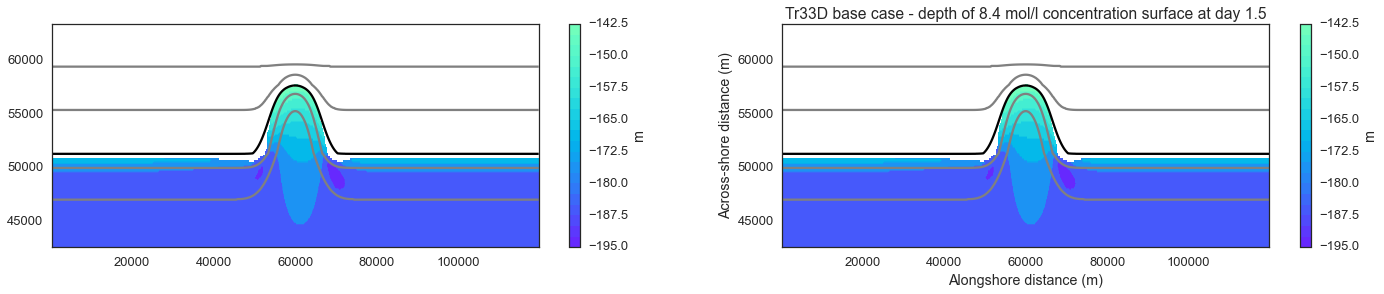

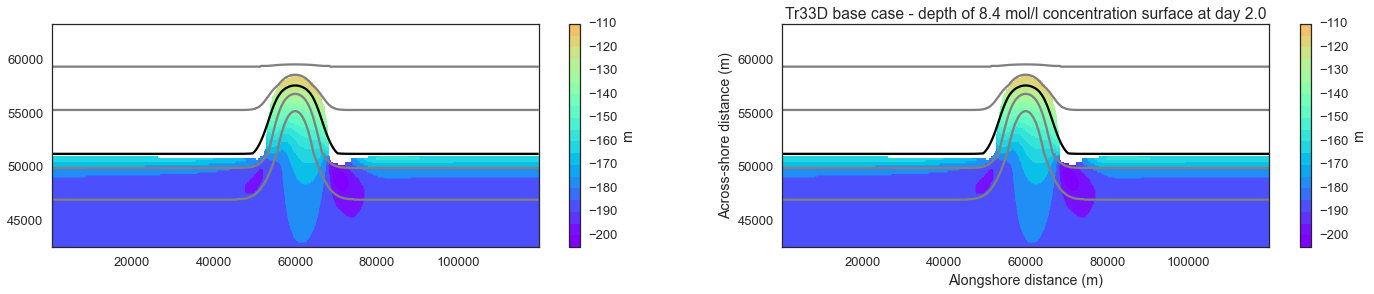

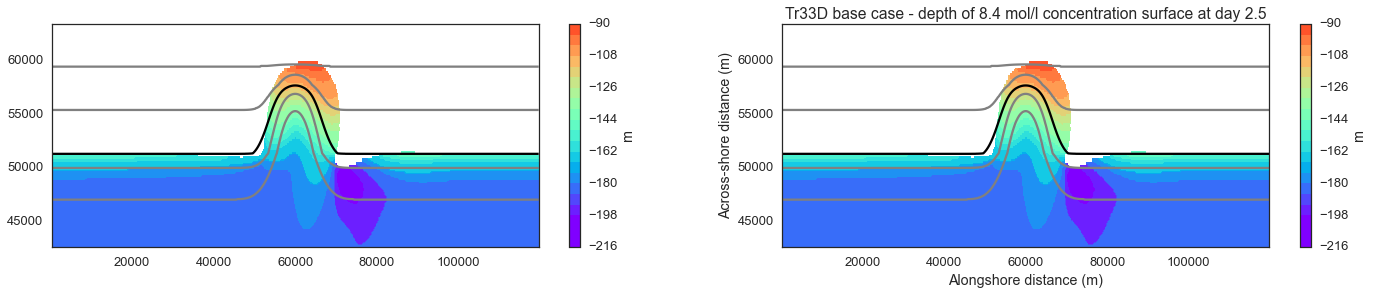

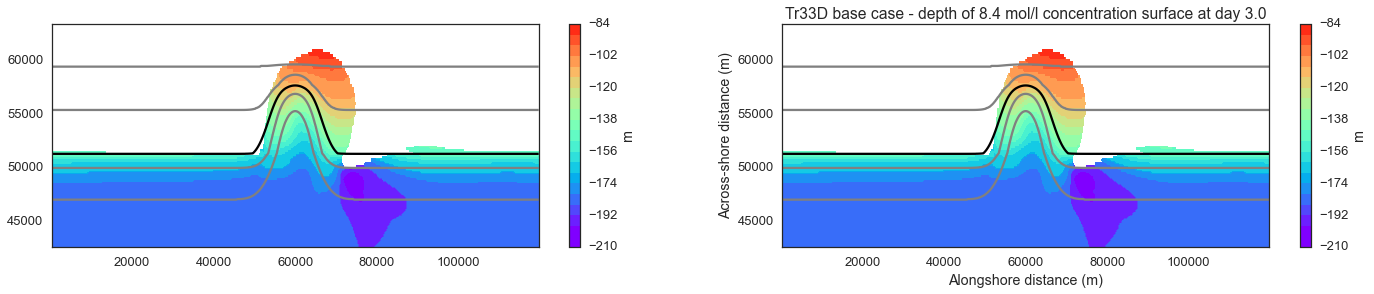

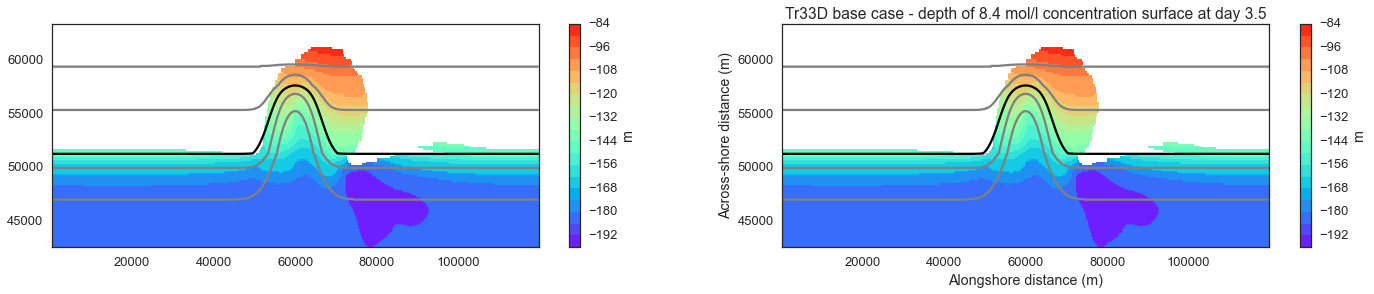

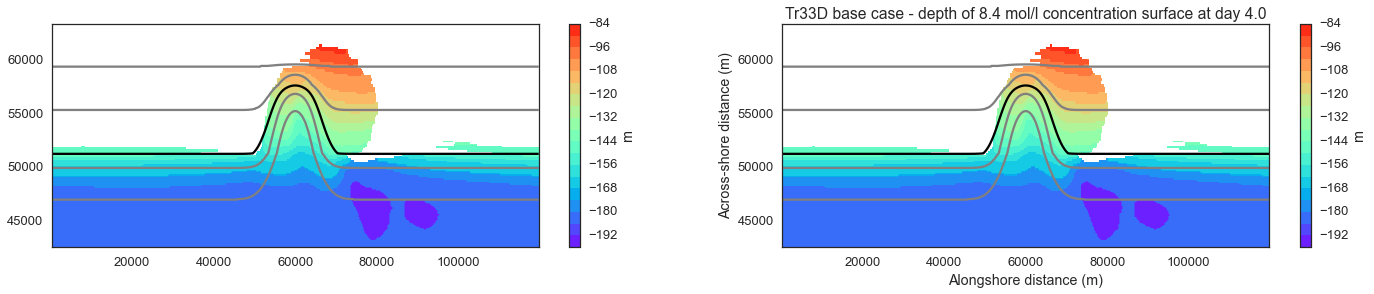

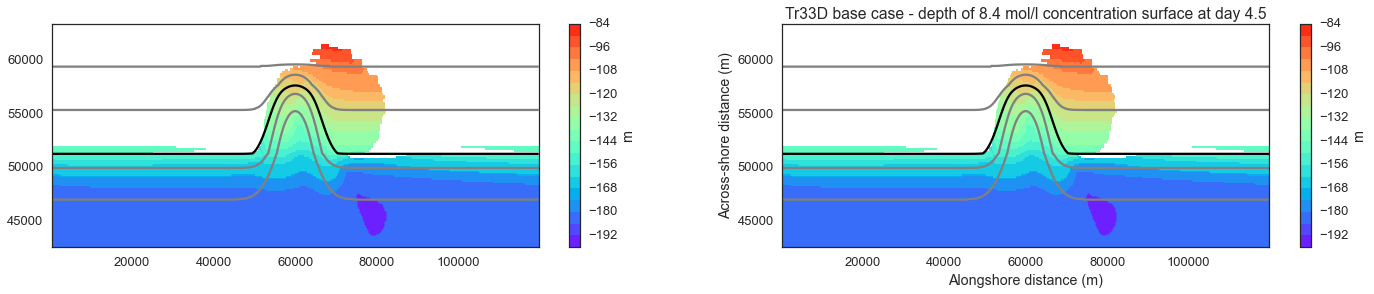

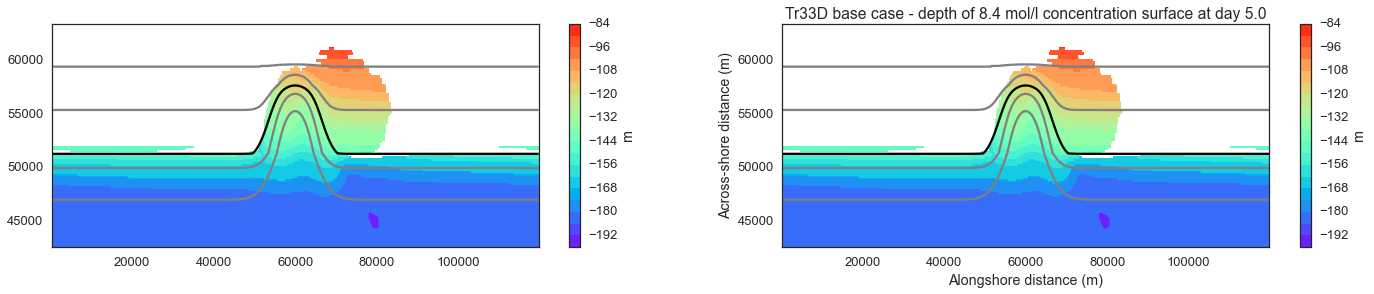

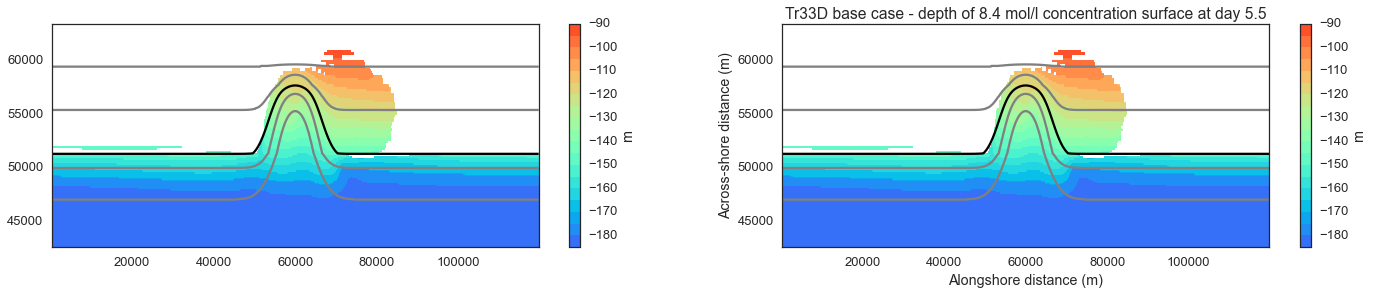

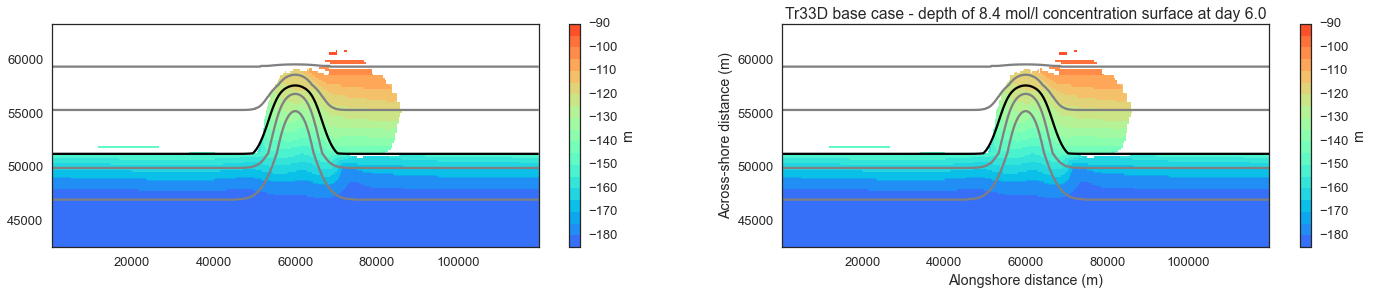

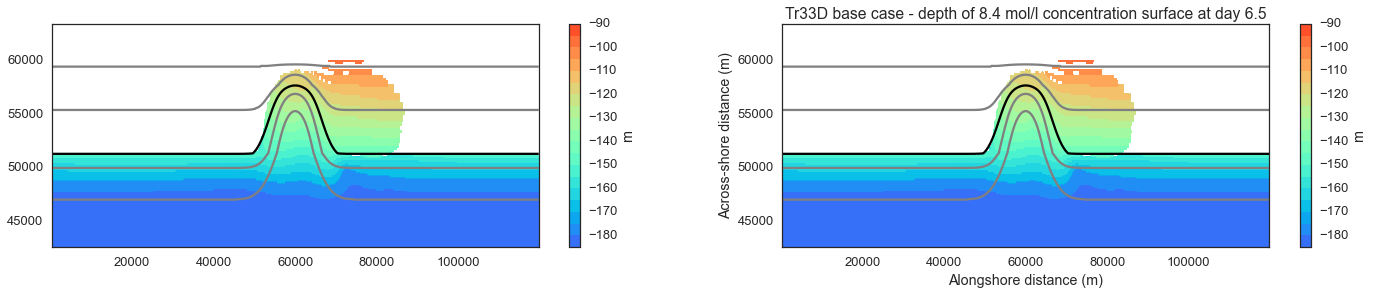

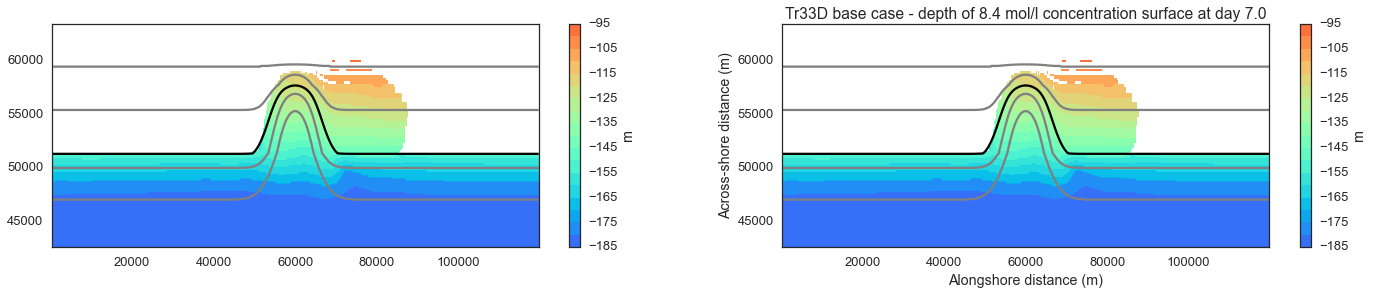

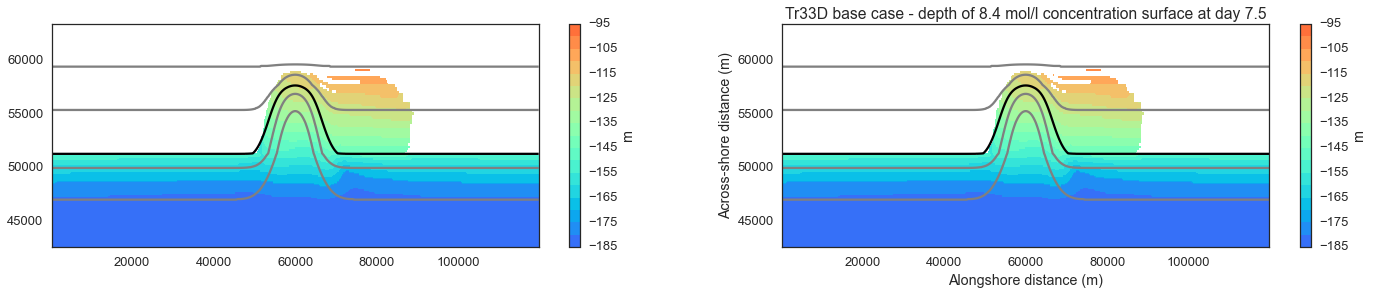

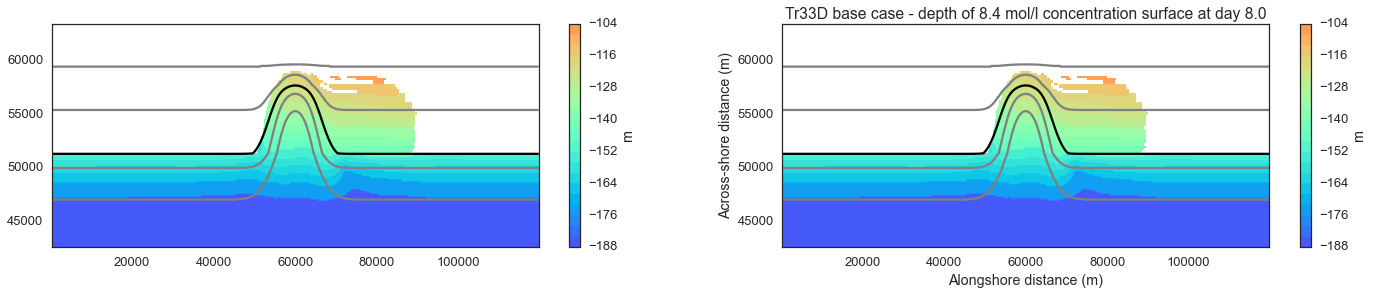

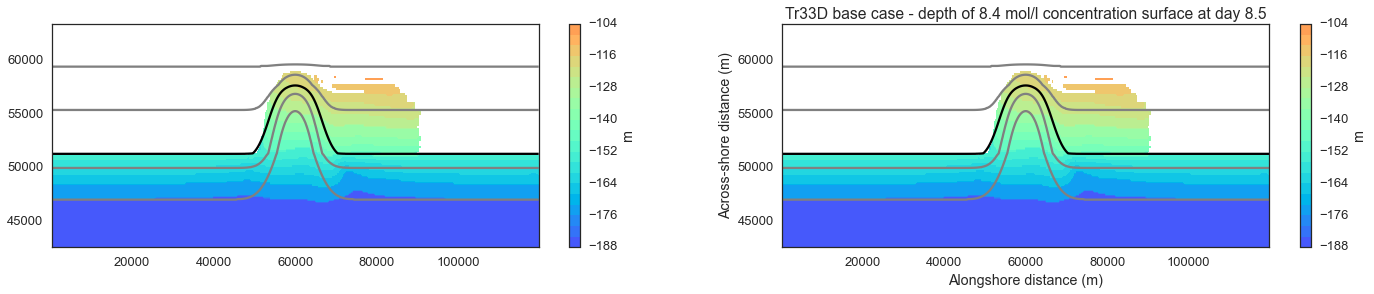

In [19]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


for tt in range(18):
    fig,((ax1),(ax2)) = plt.subplots(1, 2, figsize=(24, 4))

    iso = ax1.contourf(xc[160:-75,:],yc[160:-75,:],ConcDepths3[tt,160:-75,:],20,cmap='rainbow',vmin=-200,vmax=-80)
    cb = fig.colorbar(iso, shrink=1,ax=ax1)

    cb.set_label('m')
    cset = ax1.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    plt.title('Tr1 base case - depth of 8.4 mol/l concentration surface at day %0.1f ' %(tt/2.0))
    plt.ylabel('Across-shore distance (m)')
    plt.xlabel('Alongshore distance (m)')
    
    iso = ax2.contourf(xc[160:-75,:],yc[160:-75,:],ConcDepths3c[tt,160:-75,:],20,cmap='rainbow',vmin=-200,vmax=-80)
    cb = fig.colorbar(iso, shrink=1,ax=ax2)

    cb.set_label('m')
    cset = ax2.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    plt.title('Tr33D base case - depth of 8.4 mol/l concentration surface at day %0.1f ' %(tt/2.0))
    plt.ylabel('Across-shore distance (m)')
    plt.xlabel('Alongshore distance (m)')
    
    plt.show()

#fig.save

## Isopycnal surfaces

In [ ]:
phiHyd = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/phiHydGlob.nc'

Temp = rout.getField(CanyonState,'Temp')
S = rout.getField(CanyonState,'S')
P = rout.getField(phiHyd,'phiHyd')


In [ ]:
depth = bathy

nzlim = 30

g = 9.81 # ms^-2

maskExp = mpt.maskExpand(MaskC,Tr1)

TempMask=np.ma.array(Temp,mask=maskExp)   
SMask=np.ma.array(S,mask=maskExp)   


In [ ]:
# Calculate density and N

alpha = 1.7E-4/237 # 1/degC
beta = 7.6E-4

#Linear eq. of state 
rho = RhoRef*(np.ones(np.shape(TempMask)) - alpha*(TempMask) + beta*(SMask))


In [ ]:
# Find max density on shelf
maxRho = np.max (rho[:,:30,227,:])
maxRho

In [ ]:
densDepths = np.empty((19,360,360))
    
for tt in range(18):
    DensInd = np.argmax(rho[tt,:,:,:]>=maxRho,axis=0) 
    for i in range(360):
        for j in range(360):
            densDepths[tt,i,j] = z[DensInd[i,j]]

print(np.shape(densDepths))
DensDepthsMasked = np.ma.masked_values(DensDepths,-2.5)
DensDepths[np.where(np.ma.getmask(DensDepthsMasked)==True)] = np.nan

    


In [ ]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


for tt in range(18):
    fig,((ax1),(ax2)) = plt.subplots(1, 2, figsize=(24, 4))

    iso = ax1.contourf(xc[160:-75,:],yc[160:-75,:],DensDepths[tt,160:-75,:],20,cmap='rainbow',vmin=-200,vmax=-80)
    cb = fig.colorbar(iso, shrink=1,ax=ax1)

    cb.set_label('m')
    cset = ax1.contour(xc[160:-75,:],yc[160:-75,:],-bathy[160:-75,:],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    plt.title('Density base case - depth of %f $kg/m^3$ concentration surface at day %0.1f ' %(tt/2.0, maxRho))
    plt.ylabel('Across-shore distance (m)')
    plt.xlabel('Alongshore distance (m)')
    
    
    plt.show()

#fig.save